# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

In [4]:
# np.argmax() #
a = np.array([[1,2,3],[3,1,2]])
a

array([[1, 2, 3],
       [3, 1, 2]])

In [5]:
np.argmax(a, axis = 0)

array([1, 0, 0])

In [6]:
np.argmax(a, axis = 1)

array([2, 0])

In [ ]:
np.argmax(a)

2

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [ ]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [ ]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [ ]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') )
# 노드 3개 setosa, versinica, virginia 타겟 수만큼 지정해야함 #★

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 138ms/step - loss: 1.3057 - val_loss: 1.1417
Epoch 2/50
3/3 [==============================] - 0s 33ms/step - loss: 1.0718 - val_loss: 0.9921
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.9201 - val_loss: 0.8006
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.7710 - val_loss: 0.6490
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 0.6805 - val_loss: 0.5512
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6094 - val_loss: 0.4840
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.5553 - val_loss: 0.4418
Epoch 8/50
3/3 [==============================] - 0s 29ms/step - loss: 0.5087 - val_loss: 0.4113
Epoch 9/50
3/3 [==============================] - 0s 28ms/step - loss: 0.4743 - val_loss: 0.3846
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 0.4444 - val_loss: 0.3617
Epoch 11/50
3/3 [===========

* 학습결과 그래프

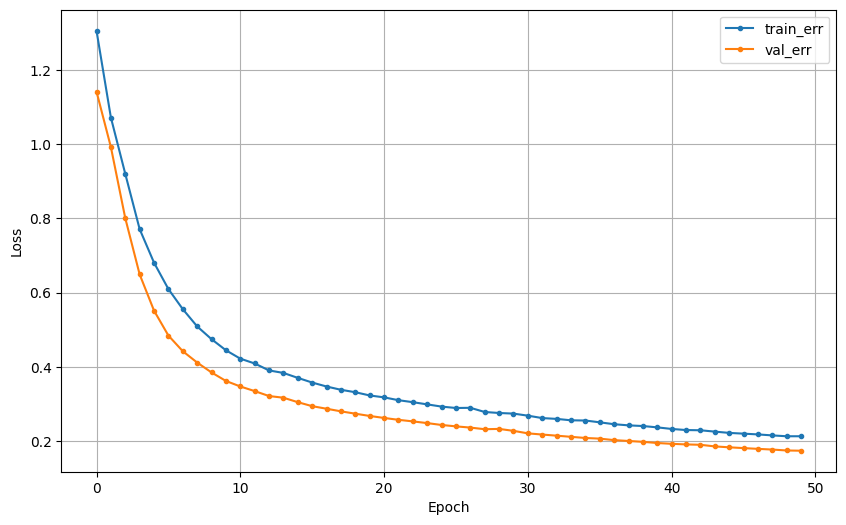

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[9.7208339e-01, 2.7783332e-02, 1.3327476e-04],
       [1.4597559e-02, 7.5719124e-01, 2.2821124e-01],
       [1.7438877e-02, 7.0339024e-01, 2.7917084e-01],
       [6.1488099e-04, 3.0467749e-01, 6.9470757e-01],
       [3.9405499e-02, 8.6000258e-01, 1.0059184e-01]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [ ]:
# 전체에 적용해서 변환합시다.
# 큰값의 인덱스가 필요 0/1/2
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [ ]:
y_val

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
95     1
88     1
0      0
46     0
11     0
106    2
85     1
1      0
51     1
130    2
55     1
134    2
37     0
65     1
56     1
Name: Species, dtype: int64

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

#      예측 0 1
# 실제
# 0
# 1

[[13  0  0]
 [ 0 16  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.89      0.84        18
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax') #클래스 수만큼 3★
                    ])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')
# y를 정수인코딩 할때 / 원핫인코딩할때는 categorical_crossentropy

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 83ms/step - loss: 1.2970 - val_loss: 1.2270
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2105 - val_loss: 1.1608
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 1.1461 - val_loss: 1.1100
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 1.0967 - val_loss: 1.0698
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 1.0573 - val_loss: 1.0373
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 1.0221 - val_loss: 1.0068
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.9949 - val_loss: 0.9758
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.9684 - val_loss: 0.9443
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 0.9415 - val_loss: 0.9104
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.9121 - val_loss: 0.8737
Epoch 11/50
3/3 [============

* 학습결과 그래프

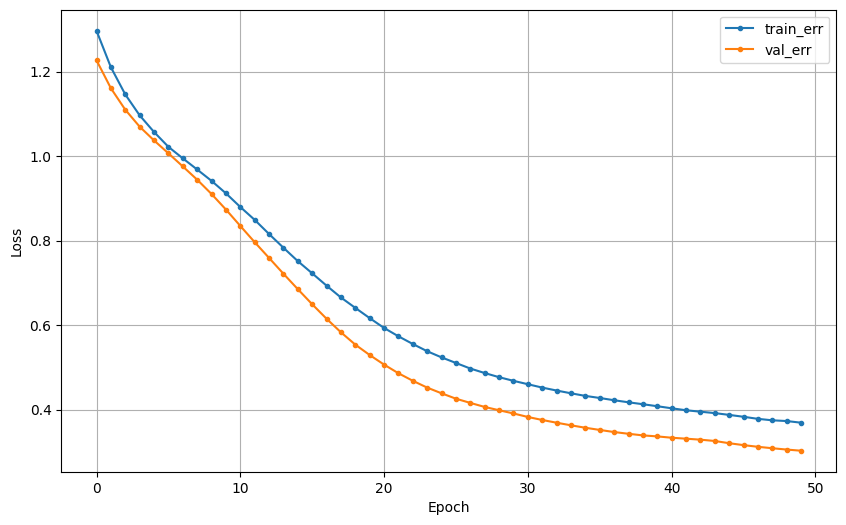

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1) # np.argmax(pred, axis=1) 동일

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0  9  9]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.50      0.67        18
           2       0.61      1.00      0.76        14

    accuracy                           0.80        45
   macro avg       0.87      0.83      0.81        45
weighted avg       0.88      0.80      0.79        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
n=x_train.shape[1]
model = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(3, activation='softmax')]) # 이진분류일때는 노드1, sigmoid #★
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 40        
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.009), loss='sparse_categorical_crossentropy')

* 학습결과 그래프

Epoch 1/100
3/3 [==============================] - 1s 79ms/step - loss: 1.1491 - val_loss: 1.1108
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0872 - val_loss: 1.0667
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0537 - val_loss: 1.0331
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0290 - val_loss: 1.0026
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0027 - val_loss: 0.9733
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9728 - val_loss: 0.9437
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9406 - val_loss: 0.9118
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9056 - val_loss: 0.8829
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.8740 - val_loss: 0.8524
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8418 - val_loss: 0.8202
Epoch 11/100
3/3 [=

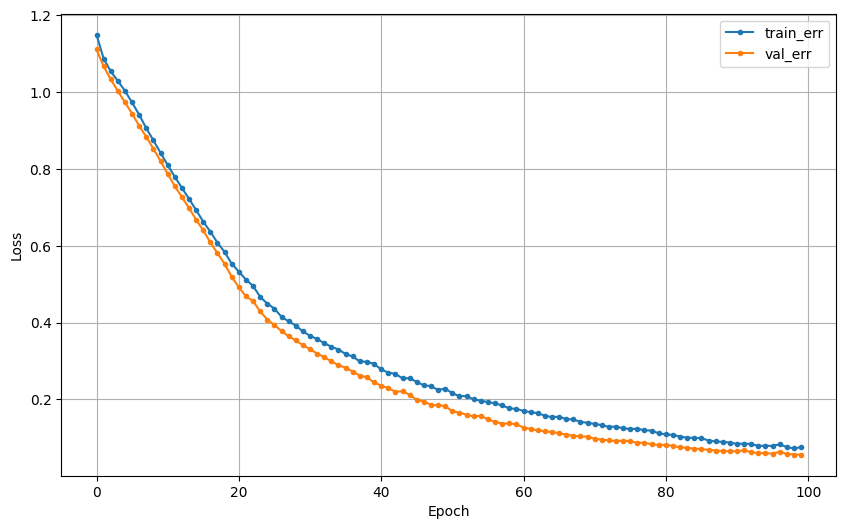

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=.2).history
dl_history_plot(hist)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred=model.predict(x_val)
pred_1 = pred.argmax(axis=1)
pred_1

2/2 [==============================] - 0s 4ms/step


array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [ ]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
y_c = to_categorical(y.values, 3) #★

In [ ]:
y_c[45:60]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [ ]:
y_train.shape

(105, 3)

### (3) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy') # 원핫인코딩일때 categorical_crossentropy #★

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 0s 76ms/step - loss: 0.1695 - val_loss: 0.1401
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1447 - val_loss: 0.1394
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1481 - val_loss: 0.1335
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1379 - val_loss: 0.1327
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.1378 - val_loss: 0.1350
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1360 - val_loss: 0.1296
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1331 - val_loss: 0.1273
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1308 - val_loss: 0.1261
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1301 - val_loss: 0.1250
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1285 - val_loss: 0.1241
Epoch 11/100
3/3 [=

* 학습결과 그래프

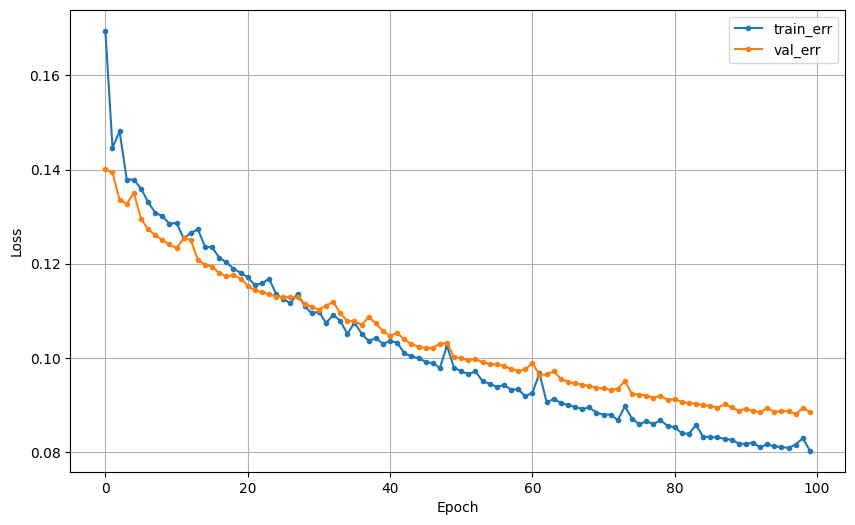

In [ ]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]
# 아웃풋레이어 엑티베이션 함수 softmax를 해서 이렇게 확률값이 나온것이다 / one hot encoding과 무관

2/2 [==============================] - 0s 5ms/step


array([[7.0960560e-10, 9.9946465e-03, 9.9000525e-01],
       [7.8563666e-12, 1.2685161e-02, 9.8731488e-01],
       [9.9832088e-01, 1.6790775e-03, 5.7729946e-11],
       [5.1124812e-07, 3.1146425e-01, 6.8853527e-01],
       [9.9967277e-01, 3.2719070e-04, 2.6455773e-12]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [ ]:
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [ ]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [ ]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.93      0.87        15
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

